In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os


In [54]:
url = 'https://raw.githubusercontent.com/cheryvmak/Dataset-Repo/refs/heads/main/Data_files/home_loan_train.csv'
train_data = pd.read_csv(url)
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [55]:
# copy and Read in data
df1 = train_data.copy()

# Inspect dataset
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


From this initial view, I could notice that;
1.  The Age column, some of the values are written in words instead of in digits.
2.  The Email column, some of them contains double "@".
3.  The Salary colum, some contains the dollar symbols and comma.
4.  The Joined Date column, The date formating is not consistent.
5.  The Department column, I can notice the use of Abbreviation amongst full names or words.

In [4]:
df1.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
# LEts check the dimension of the dataset
print(f"Rows: {df1.shape[0]}, Columns: {df1.shape[1]}")

Rows: 614, Columns: 13


In [118]:
df1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


From the information above, we already have a lead of what do to our data to ensure a consistency.

1. I noticed that Gender, Married, Dependents, Self_Employed, LoanAmount,Loan_Amount_Term and Credit_History have some missing values.
2. Loan_Status,Property_Area,       data type is in object.
3. Salary data type is in object.
4. Join Date does not look pythonic.
5. Also, the Join Data datatypes is not in datetime format
These might not be the only issues with our data, as we explore more, we might still notice some inconsistencies.

In [7]:
# count of missing values
missing = df1.isnull().sum()
missing_value = missing[missing > 0].sort_values(ascending=False)
print(missing_value)

Credit_History      50
Self_Employed       32
LoanAmount          22
Dependents          15
Loan_Amount_Term    14
Gender              13
Married              3
dtype: int64


In [14]:
missing = df1.isnull().sum()
missing_percent = (missing / len(df1)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

print(missing_percent)  

Credit_History      8.143322
Self_Employed       5.211726
LoanAmount          3.583062
Dependents          2.442997
Loan_Amount_Term    2.280130
Gender              2.117264
Married             0.488599
dtype: float64


In [56]:
missing = df1.isnull().sum()
missing_percent = (missing / len(df1)) * 100

# Keep only columns with missing values
missing = missing[missing > 0]
missing_percent = missing_percent[missing_percent > 0]

# Combine and format with "%" symbol
missing_table = pd.DataFrame({
    'Missing Count': missing,
    'Missing Percentage': missing_percent.map("{:.2f}%".format)
}).sort_values(by='Missing Count', ascending=False)

print(missing_table)


# Plot
# plt.figure(figsize=(8, 5))
# plt.barh(missing_table.index, missing_table['Missing Percentage'], color='skyblue', edgecolor='black')
# plt.xlabel('Missing Percentage (%)')
# plt.title('Missing Values per Column')
# plt.gca().invert_yaxis()  # Highest missing values at the top

# #

# plt.tight_layout()
# plt.show()

                  Missing Count Missing Percentage
Credit_History               50              8.14%
Self_Employed                32              5.21%
LoanAmount                   22              3.58%
Dependents                   15              2.44%
Loan_Amount_Term             14              2.28%
Gender                       13              2.12%
Married                       3              0.49%


In [57]:
df1['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [20]:
# fill categorical columns with mode
cat_cols = df1.select_dtypes(include='object').columns
for col in cat_cols:
    if df1[col].isnull().sum() > 0:
        df1[col].fillna(df1[col].mode()[0], inplace=True)

# fill numerical columns with median
num_cols = df1.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    if df1[col].isnull().sum() > 0:
        df1[col].fillna(df1[col].median(), inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_11280\3761101773.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(df1[col].mode()[0], inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_11280\3761101773.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [21]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [24]:
# Fix data types
# convert 'LoanAmount' to float
df1['LoanAmount'] = df1['LoanAmount'].astype(float)

# convert categorical variables to category type
for col in cat_cols:
    df1[col] = df1[col].astype('category')

In [26]:
# Standardize categorical variables
# strip whitespace and convert to consistent case
for col in cat_cols:
    df1[col] = df1[col].str.strip().str.lower()

In [27]:
# Handle 
# capping outliers at 99th percentile
for col in ['LoanAmount', 'ApplicantIncome']:
    upper = df1[col].quantile(0.99)
    df1[col] = df1[col].apply(lambda x: upper if x > upper else x)

In [111]:
df1['LoanAmount']

0      128.0
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

In [ ]:
def clean_loan_data(df1):
    # fill missing values
    for col in df1.select_dtypes(include='object'):
        df1[col].fillna(df1[col].mode()[0], inplace=True)
    for col in df1.select_dtypes(include=['int64', 'float64']):
        df1[col].fillna(df1[col].median(), inplace=True)

    # type conversions
    for col in df1.select_dtypes(include='object'):
        df1[col] = df1[col].astype('category')
        df1[col] = df1[col].str.strip().str.lower()

    # outlier capping
    for col in ['LoanAmount', 'ApplicantIncome']:
        if col in df1.columns:
            upper = df1[col].quantile(0.99)
            df1[col] = df1[col].apply(lambda x: upper if x > upper else x)

    return df1

In [59]:
#df = pd.read_csv('/content/loan_prediction.csv')
df1 = clean_loan_data(df1)
df1

C:\Users\USER\AppData\Local\Temp\ipykernel_11280\670303884.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(df1[col].mode()[0], inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_11280\670303884.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,lp001002,male,no,0,graduate,no,5849.0,0.0,128.0,360.0,1.0,urban,y
1,lp001003,male,yes,1,graduate,no,4583.0,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0,graduate,yes,3000.0,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0,not graduate,no,2583.0,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0,graduate,no,6000.0,0.0,141.0,360.0,1.0,urban,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,lp002978,female,no,0,graduate,no,2900.0,0.0,71.0,360.0,1.0,rural,y
610,lp002979,male,yes,3+,graduate,no,4106.0,0.0,40.0,180.0,1.0,rural,y
611,lp002983,male,yes,1,graduate,no,8072.0,240.0,253.0,360.0,1.0,urban,y
612,lp002984,male,yes,2,graduate,no,7583.0,0.0,187.0,360.0,1.0,urban,y


In [60]:
df1.duplicated().sum()

np.int64(0)

In [ ]:
# # Using median to handle the missing data for the age and footlength of the possum
# # This is because median is robust against outliers compare to mean 

# # find the median values of age and footlength features of the possum
# Gender_mod = df1['Gender'].mode()
# print("The modal gender of the possum is:", float(Gender_mod ))
# print('\n')
# Married_mod = df1['Married'].mode()
# print("The median footlgth of the possum is:", float(Married_mod))


In [61]:
# lets pick out the numerical columns and get the descriptions
num_features = df1.select_dtypes(include=['float64', 'int64']).columns
df1[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5209.602394,4533.747664,150.0,2877.50,3812.5,5795.00,32540.41
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.00
LoanAmount,614.0,144.702101,78.645640,9.0,100.25,128.0,164.75,495.87
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.00
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.00


In [62]:
def univariate_numerical_eda(df1, column):
    """
    Performs univariate EDA on a single numerical column.
    Displays summary statistics, skewness, kurtosis, histogram, KDE, and boxplot.
    """
    print(f" Feature: {column}")
    print("="*40)
    print(df1[column].describe().to_frame())
    print(f"\nSkewness: {df1[column].skew():.3f}")
    print(f"Kurtosis: {df1[column].kurt():.3f}")

    plt.figure(figsize=(12,4))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df1[column], kde=True, bins=30, color='teal')
    plt.title(f'\n Distribution of {column}', fontsize=13)
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df1[column], color='teal')
    plt.title(f'\n Boxplot of {column}', fontsize=13)

    plt.tight_layout()
    plt.show()

    # Optional note on transformation
    if abs(df1[column].skew()) > 1:
        print(f"\n {column} is highly skewed. Consider log or Box-Cox transformation.")
    elif abs(df1[column].skew()) > 0.5:
        print(f"{column} is moderately skewed.")
    else:
        print(f"{column} is fairly symmetric.")


 Feature: ApplicantIncome
       ApplicantIncome
count       614.000000
mean       5209.602394
std        4533.747664
min         150.000000
25%        2877.500000
50%        3812.500000
75%        5795.000000
max       32540.410000

Skewness: 3.434
Kurtosis: 15.165


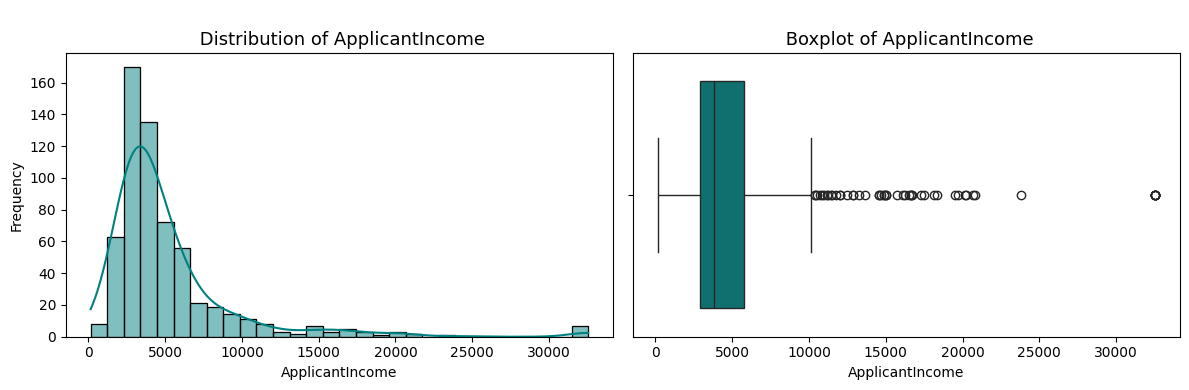


 ApplicantIncome is highly skewed. Consider log or Box-Cox transformation.


In [63]:
# 1. ApplicantIncome
univariate_numerical_eda(df1, 'ApplicantIncome')

 Feature: LoanAmount
       LoanAmount
count  614.000000
mean   144.702101
std     78.645640
min      9.000000
25%    100.250000
50%    128.000000
75%    164.750000
max    495.870000

Skewness: 2.220
Kurtosis: 6.647


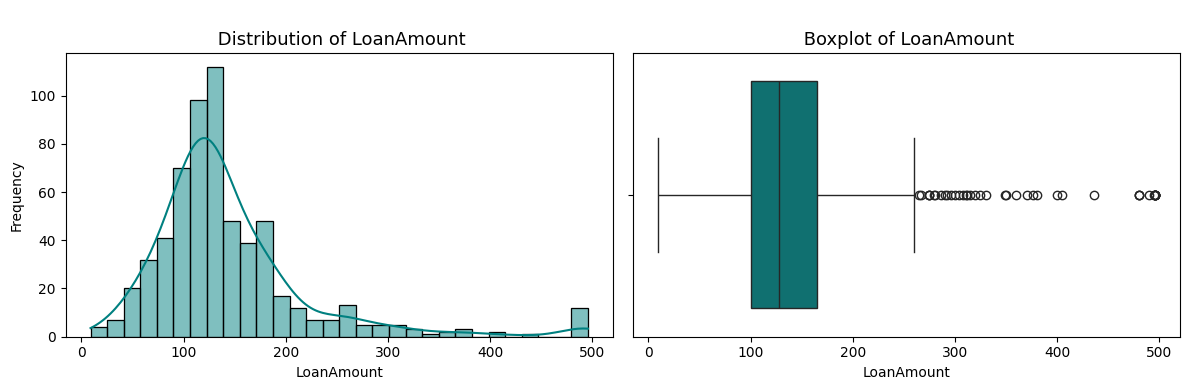


 LoanAmount is highly skewed. Consider log or Box-Cox transformation.


In [64]:
# 1. LoanAmount	
univariate_numerical_eda(df1, 'LoanAmount')

 Feature: ApplicantIncome
       ApplicantIncome
count       614.000000
mean       5209.602394
std        4533.747664
min         150.000000
25%        2877.500000
50%        3812.500000
75%        5795.000000
max       32540.410000

Skewness: 3.434
Kurtosis: 15.165


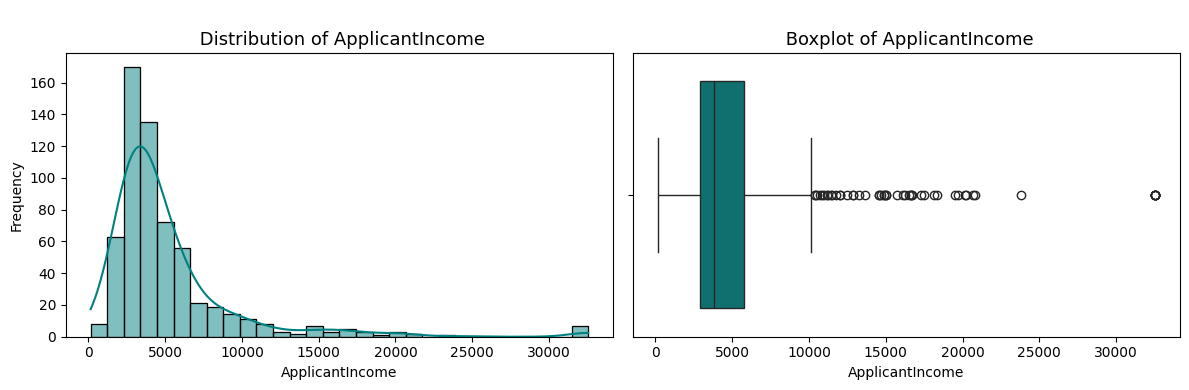


 ApplicantIncome is highly skewed. Consider log or Box-Cox transformation.
 Feature: CoapplicantIncome
       CoapplicantIncome
count         614.000000
mean         1621.245798
std          2926.248369
min             0.000000
25%             0.000000
50%          1188.500000
75%          2297.250000
max         41667.000000

Skewness: 7.492
Kurtosis: 84.956


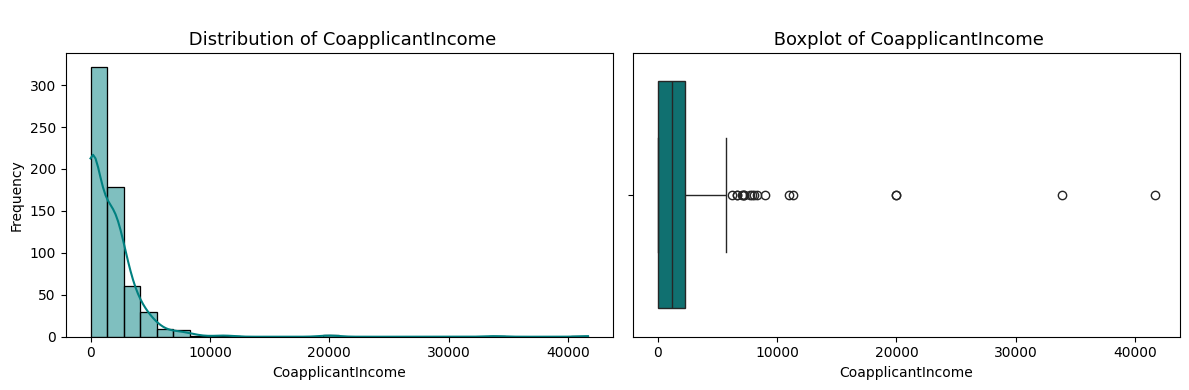


 CoapplicantIncome is highly skewed. Consider log or Box-Cox transformation.
 Feature: LoanAmount
       LoanAmount
count  614.000000
mean   144.702101
std     78.645640
min      9.000000
25%    100.250000
50%    128.000000
75%    164.750000
max    495.870000

Skewness: 2.220
Kurtosis: 6.647


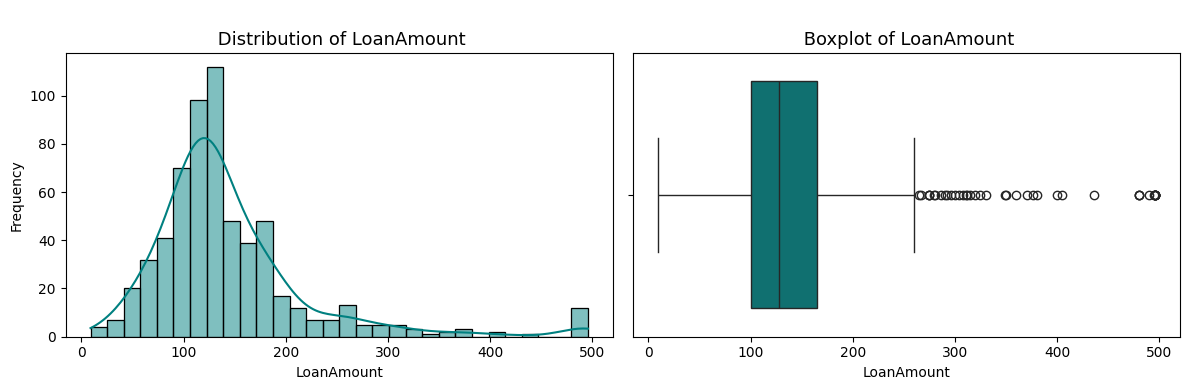


 LoanAmount is highly skewed. Consider log or Box-Cox transformation.
 Feature: Loan_Amount_Term
       Loan_Amount_Term
count        614.000000
mean         342.410423
std           64.428629
min           12.000000
25%          360.000000
50%          360.000000
75%          360.000000
max          480.000000

Skewness: -2.402
Kurtosis: 6.925


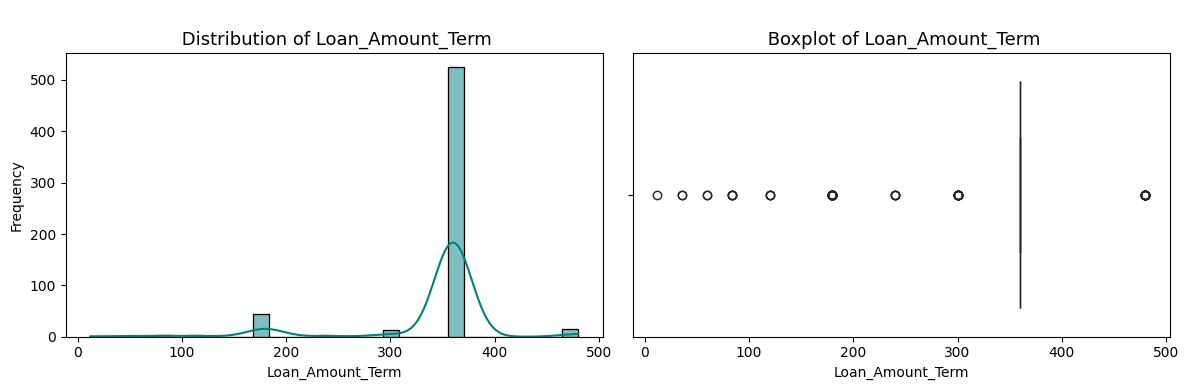


 Loan_Amount_Term is highly skewed. Consider log or Box-Cox transformation.
 Feature: Credit_History
       Credit_History
count      614.000000
mean         0.855049
std          0.352339
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000

Skewness: -2.022
Kurtosis: 2.095


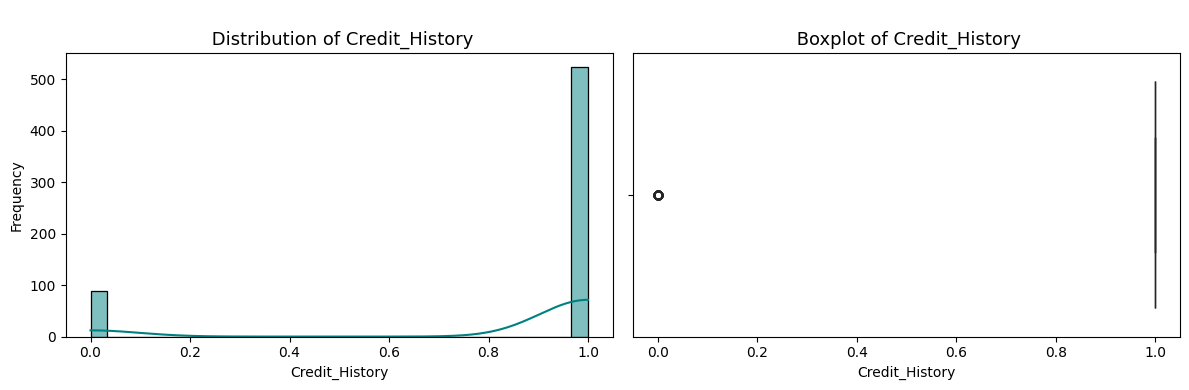


 Credit_History is highly skewed. Consider log or Box-Cox transformation.


In [65]:
# We can loop to save time
for col in num_features:
    univariate_numerical_eda(df1, col)

In [66]:
def univariate_categorical_eda(df1, column):
    """
    Performs univariate EDA on a categorical or ordinal column.
    Displays frequency table, proportion, and a countplot.
    """
    print(f"Feature: {column}")
    print("="*40)

    # Frequency + proportion
    freq = df1[column].value_counts()
    prop = df1[column].value_counts(normalize=True) * 100
    summary = pd.DataFrame({'Count': freq, 'Percentage': prop.round(2)})
    print(summary)
    print()

    # Visualization

    counts = df1[column].value_counts()

    # Bar Chart
    plt.figure(figsize=(8,5))
    plt.bar(counts.index, counts.values, edgecolor='black')
    plt.title(f"{column} Distribution")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

    # Pie Chart
    plt.figure(figsize=(8,5))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"{column} Proportion")
    plt.show()

    # # Countplot with percentages
    # plt.figure(figsize=(8,5))
    # ax = sns.countplot(x=column, data=df1, palette='Set2', order=freq.index,color='teal')
    # plt.title(f'Distribution of {column}', fontsize=13)
    # plt.xlabel(column)
    # plt.ylabel('Count')

    # Annotate each bar with percentage
    # total = len(df1[column])
    # for p in ax.patches:
    #     height = p.get_height()
    #     ax.text(p.get_x() + p.get_width()/2, height + 1,
    #             f'{(height/total)*100:.1f}%', ha='center')

    plt.tight_layout()
    plt.show()


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


Feature: Education
              Count  Percentage
Education                      
graduate        480       78.18
not graduate    134       21.82



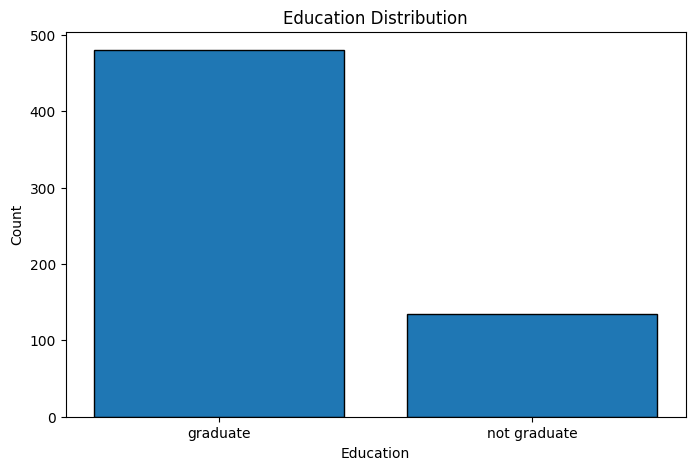

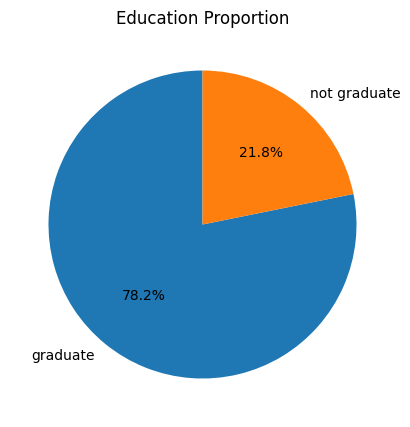

<Figure size 640x480 with 0 Axes>

In [67]:
univariate_categorical_eda(df1,"Education" )

Feature: Self_Employed
               Count  Percentage
Self_Employed                   
no               532       86.64
yes               82       13.36



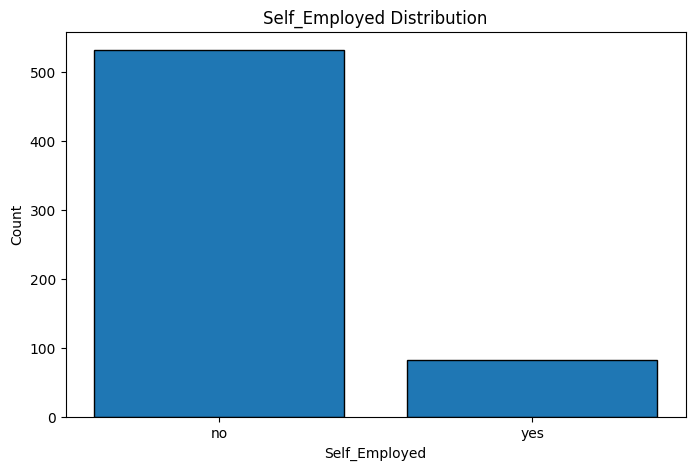

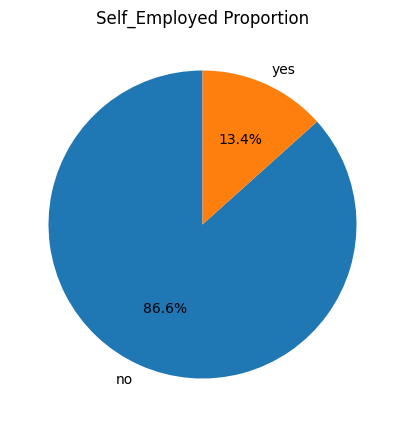

<Figure size 640x480 with 0 Axes>

In [68]:
univariate_categorical_eda(df1,"Self_Employed" )

Feature: Property_Area
               Count  Percentage
Property_Area                   
semiurban        233       37.95
urban            202       32.90
rural            179       29.15



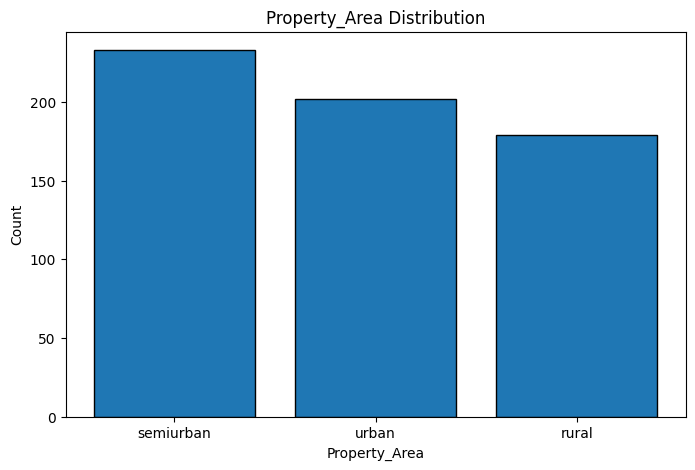

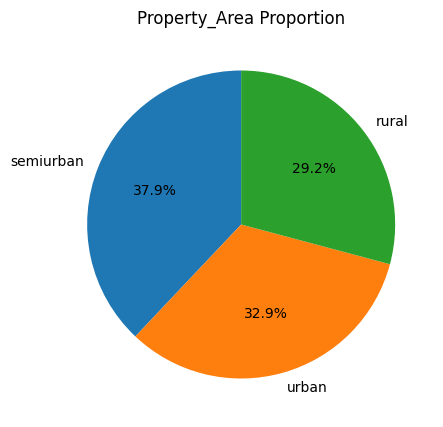

<Figure size 640x480 with 0 Axes>

In [69]:
univariate_categorical_eda(df1,'Property_Area' )

In [ ]:
# counts = df1['Education'].value_counts()

# plt.figure(figsize=(6,4))
# plt.bar(counts.index, counts.values, color='skyblue', edgecolor='black')

# plt.title("Education Distribution")
# plt.xlabel("Education Background")
# plt.ylabel("Count")
# plt.show()

In [ ]:
# counts = df1["Education"].value_counts()

# plt.figure(figsize=(5,5))
# plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightpink'], startangle=90)
# plt.title("Education Distribution")
# plt.show()

In [ ]:
# counts = df1['Self_Employed'].value_counts()

# plt.figure(figsize=(6,4))
# plt.bar(counts.index, counts.values, color='skyblue', edgecolor='black')

# plt.title("Employment Distribution")
# plt.xlabel("Employment Status")
# plt.ylabel("Count")
# plt.show()

In [ ]:
# counts = df1["Self_Employed"].value_counts()

# plt.figure(figsize=(5,5))
# plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightpink'], startangle=90)
# plt.title("Employment proportion")
# plt.show()

In [ ]:
# counts = df1['Property_Area'].value_counts()

# plt.figure(figsize=(6,4))
# plt.bar(counts.index, counts.values, color='skyblue', edgecolor='black')

# plt.title("Property_Area Distribution")
# plt.xlabel("Property_Area")
# plt.ylabel("Count")
# plt.show()

In [ ]:
# counts = df1["Property_Area"].value_counts()

# plt.figure(figsize=(5,5))
# plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightpink'], startangle=90)
# plt.title("Property_Area proportion")
# plt.show()

In [70]:
 # lets pick out the categorical columns and get the descriptions
cat_features = df1.select_dtypes(include=['object']).columns
df1[cat_features].describe().T

,count,unique,top,freq
Loan_ID,614,614,lp002990,1
Gender,614,2,male,502
Married,614,2,yes,401
Dependents,614,4,0,360
Education,614,2,graduate,480
Self_Employed,614,2,no,532
Property_Area,614,3,semiurban,233
Loan_Status,614,2,y,422


In [ ]:
# # We can loop to save time
# for col in cat_features:
#     univariate_categorical_eda(df1, col)

| Feature Type                     | Observation                                                                                                          | What It Means / Implication                                                                                                                             |
| -------------------------------- | -------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Most numeric features**        | Continuous, but several (e.g., `residual sugar`, `total sulfur dioxide`, `free sulfur dioxide`) are **right-skewed** | These long tails can distort algorithms sensitive to scale (e.g., linear regression, KNN ).  We might apply **log or Box-Cox transformation** to normalize. |
| **`alcohol`**                    | Often roughly symmetric but **wide range**                                                                           | Important predictor — normalization or standardization can stabilize learning.                                                                          |
| **`volatile acidity`**           | Often slightly right-skewed                                                                                          | Outliers might indicate poor fermentation  we will check relationships with `quality` later.                                                             |
| **Outliers visible in boxplots** | Especially in sulfur-related variables                                                                               | Before modeling, we must decide: **clip, transform, or leave** (some are natural domain outliers).                                                      |
| **`quality` (numeric)**          | Discrete integers, concentrated in 5–6                                                                               | Dataset is **imbalanced** — middle (Medium quality) dominates.                                                                                          |


| Insight                              | Why It Matters                                                                                                 | Actionable Step                                                                  |
| ------------------------------------ | -------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------- |
| **Skewed variables**                 | Some algorithms (like linear/logistic regression, SVMs, KNNs) assume features are approximately normal.        | Apply transformations (`np.log1p`, `StandardScaler`, etc.) where needed.         |
| **Wide feature ranges**              | Features measured on different scales (e.g., pH ~3–4, sulfur dioxide ~0–300) can cause biased weight learning. | Use **scaling** (e.g., StandardScaler or MinMaxScaler).                          |
| **Outliers**                         | May heavily influence mean-based models.                                                                       | Investigate domain causes - use **IQR-based clipping or robust scaling**.        |
| **Imbalanced target**                | ML models may favor the majority class (“Medium”).                                                             | Use **resampling** (SMOTE, stratified split) or **class weights** later.         |
| **Ordinal target (`quality_label`)** | Although `quality` is numeric, its meaning is ordinal.                                                         | Consider both: regression (numeric quality) or classification (Low/Medium/High). |


In summary, 
So, at this stage:

- We understand our variables individually

- We know where to clean, transform, or normalize
- We have seen what our class is like(wine quality) in terms of balance

We can now move into Bivariate EDA, to see how these variables relate to each other and to quality

----------------------------------------------------------------
 ### **2. Bivariate analysis**
 ---------------------------------------------------------------

This explore **relationships** between **two variables** using **scatter plots**,**boxplots**, and **bar plots**. This helps reveal trends, patterns, and possible associations.

- Our goals is to understand how two variables relate, especially how input **features** relate to the **target**.
This helps us:

- To identify predictive features

- To detect linear/nonlinear trends

- To spot interactions

- To see where transformation or encoding may help later

In [71]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,lp001002,male,no,0,graduate,no,5849.0,0.0,128.0,360.0,1.0,urban,y
1,lp001003,male,yes,1,graduate,no,4583.0,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0,graduate,yes,3000.0,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0,not graduate,no,2583.0,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0,graduate,no,6000.0,0.0,141.0,360.0,1.0,urban,y


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [52]:
# Lets find the numerical features
num_features = df1.select_dtypes(include=['int64', 'float64']).columns

# convert to dataframe
# for col in num_cols:
#     num_features = df1[col].astype('int64')
num_features = pd.DataFrame(df1[num_features])
num_features.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,128.0,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0


1. Numeric to Numeric

Correlation with target

In [72]:
df1.Loan_Status.unique()

array(['y', 'n'], dtype=object)

In [73]:
def map_Loan_status(x):
    if x == 'y':
        return 1
    elif x == 'n':
        return 0
    else:
        return 'Missing record'

# lets apply our function
df1['Loan_Status'] = df1['Loan_Status'].apply(map_Loan_status)

In [74]:
df1.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,lp001002,male,no,0,graduate,no,5849.0,0.0,128.0,360.0,1.0,urban,1
1,lp001003,male,yes,1,graduate,no,4583.0,1508.0,128.0,360.0,1.0,rural,0


In [75]:
df1['Loan_Status'].unique()

array([1, 0])

In [76]:
df1['Loan_Status'].dtypes

dtype('int64')

In [77]:
# Lets find the numerical features
num_features = df1.select_dtypes(include=['int64', 'float64']).columns

# convert to dataframe
num_features = pd.DataFrame(df1[num_features])
num_features.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849.0,0.0,128.0,360.0,1.0,1
1,4583.0,1508.0,128.0,360.0,1.0,0


In [95]:


def correlation_with_target(df1, target_col, figsize=(10,2)):
    """
    Plots a heatmap showing correlation of each numeric feature against target_col.
    Returns a Series of correlations (sorted by absolute magnitude).
    """
    # Keep only numeric columns
    #numeric_df = df1.select_dtypes(include='number').copy()
    #numeric_df = df1.select_dtypes(include=['int64', 'float64']).columns
    #num_features
    if target_col not in num_features.columns:
        raise ValueError(f"Target column '{target_col}' must be numeric and present in the dataframe.")

    # compute correlations of every numeric column with the target
    corrs = num_features.corrwith(num_features[target_col]).drop(target_col)

    corrs_df = corrs.to_frame(name='corr').T  # shape (1, n)
    

    plt.figure(figsize=figsize)
    sns.heatmap(
        corrs_df,
        annot=True,
        fmt=".3f",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'orientation': 'vertical', 'shrink':0.7}
    )
    plt.xticks(rotation=45, ha='right')
    plt.yticks([0], [target_col], rotation=0)
    plt.title(f'Correlation of numeric features with {target_col}', fontsize=12)
    plt.tight_layout()
    plt.show()

    # return sorted correlations for downstream use
    return corrs.reindex(corrs.abs().sort_values(ascending=False).index)


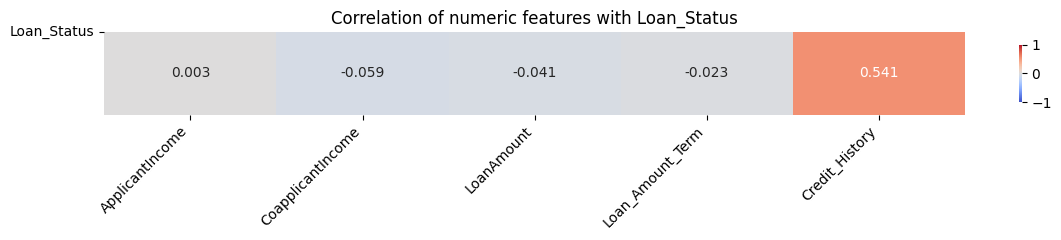

Credit_History       0.540556
CoapplicantIncome   -0.059187
LoanAmount          -0.041038
Loan_Amount_Term    -0.022549
ApplicantIncome      0.003383
dtype: float64


In [96]:
corr_series = correlation_with_target(df1, 'Loan_Status', figsize=(12,2.5))
print(corr_series) 


| Feature                  | Correlation | Interpretation                                                                                      |
| ------------------------ | ----------- | --------------------------------------------------------------------------------------------------- |
| **credit_History**              | +0.54       | Strongest positive — higher alcohol → higher quality. Likely a key predictive feature.              |
| **volatile acidity**     | −0.39       | Strong negative — too much volatility (vinegar-like taste) reduces quality. Very important feature. |
| **sulphates**            | +0.25       | Moderate positive — contributes to stability and aroma. Helpful but secondary predictor.            |
| **citric acid**          | +0.23       | Slightly positive — adds freshness; balanced wines score higher.                                    |
| **total sulfur dioxide** | −0.19       | Too much preservation reduces quality.                                                              |
| **density**              | −0.17       | Lower density wines (lighter, less sugar) tend to score higher.                                     |
| **chlorides**            | −0.13       | Saltier taste lowers quality.                                                                       |
| **fixed acidity**        | +0.12       | Minor positive — balanced acidity helps.                                                            |
| **pH**                   | −0.06       | Weak negative; higher pH (less acidic) slightly lowers quality.                                     |
| **free sulfur dioxide**  | −0.05       | Minimal linear relationship.                                                                        |
| **residual sugar**       | +0.01       | Negligible — sweetness isn’t driving quality here.                                                  |


| Action                                                     | Explanation                                                                                              |
| ---------------------------------------------------------- | -------------------------------------------------------------------------------------------------------- |
| **Keep alcohol, volatile acidity, sulphates, citric acid** | Strong predictors. You’ll definitely include them.                                                       |
| **Be cautious with total sulfur dioxide & density**        | Moderate effect; consider non-linear relationships or transformations.                                   |
| **Residual sugar, free SO₂**                               | Probably drop unless domain reasoning suggests otherwise.                                                |
| **Interactions to test:**                                  | `alcohol * acidity`, `citric acid * sulphates`, or `density * pH` — may capture subtle combined effects. |


In [97]:
from scipy.stats import pearsonr

def numeric_bivariate_plot(df1, x_col, y_col):
    """
    Plots the relationship between two numeric variables with a regression line
    and displays the correlation coefficient.

    Parameters:
    -----------
    df : pandas.DataFrame
        Dataset containing the numeric columns
    x_col : str
        Name of the first numeric variable (x-axis)
    y_col : str
        Name of the second numeric variable (y-axis)
    """

    # Calculate correlation coefficient
    corr, p_value = pearsonr(df1[x_col], df1[y_col])

    # Create plot
    plt.figure(figsize=(8, 5))
    sns.regplot(data=df1, x=x_col, y=y_col, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    
    # Title and labels
    plt.title(f"{y_col} vs {x_col}\nCorrelation: {corr:.3f} (p={p_value:.3f})", fontsize=13)
    plt.xlabel(x_col, fontsize=11)
    plt.ylabel(y_col, fontsize=11)
    plt.grid(alpha=0.3)
    plt.show()


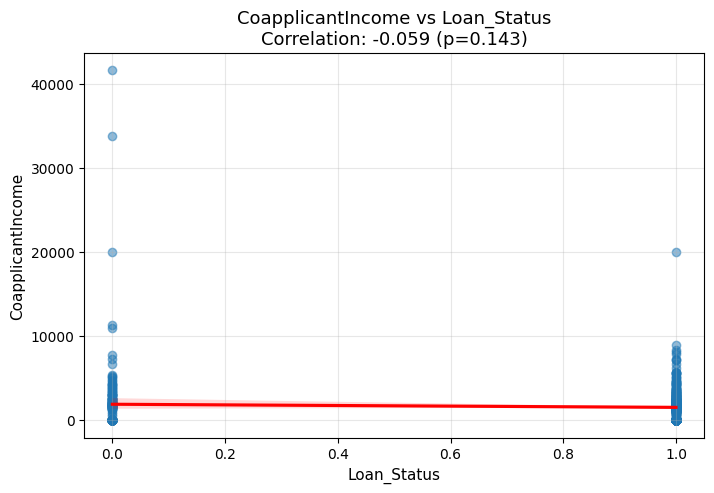

In [ ]:
numeric_bivariate_plot(df1, 'Loan_Status', 'CoapplicantIncome')

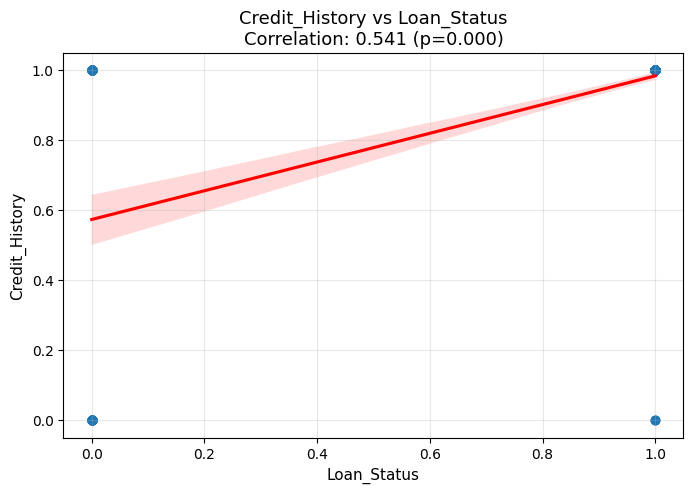

In [101]:
numeric_bivariate_plot(df1, 'Loan_Status', 'Credit_History')

In [99]:
def bivariate_num_cat(df1, feature, target='Loan_Status'):
    """
    Plots and summarizes relationship between a numerical feature and a categorical target.
    """
    print(f" Feature: {feature} vs {target}")
    print("="*50)

    # Group summary
    summary = df1.groupby(target)[feature].describe()[['mean','std','min','max']]
    print(summary)
    print()

    plt.figure(figsize=(10,5))

    # Boxplot + mean line
    sns.boxplot(x=target, y=feature, data=df1, palette='Set2')
    plt.title(f'{feature} across {target} categories', fontsize=13)
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.show()

    # Violin plot for distribution shape
    plt.figure(figsize=(10,5))
    sns.violinplot(x=target, y=feature, data=df1, palette='Set3')
    plt.title(f'{feature} distribution by {target}', fontsize=13)
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.show()


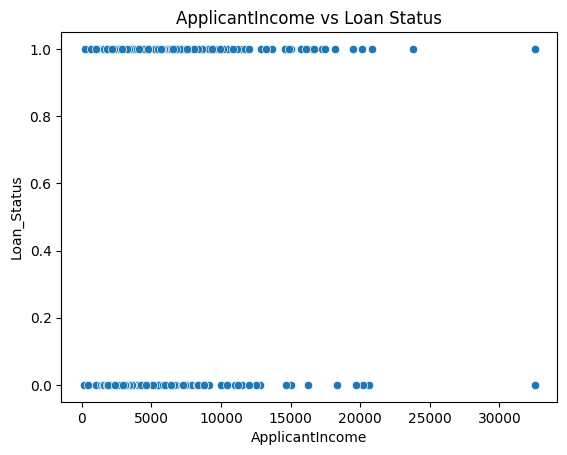

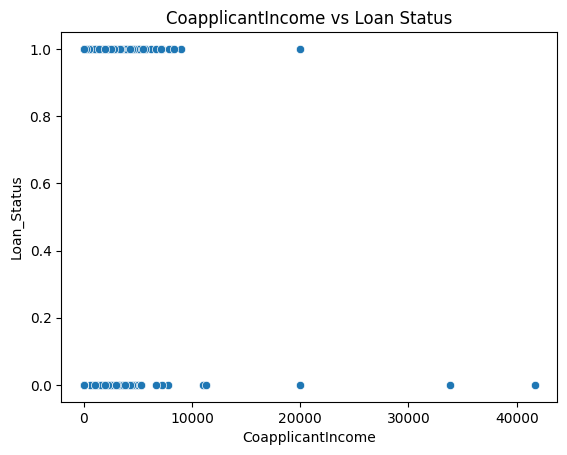

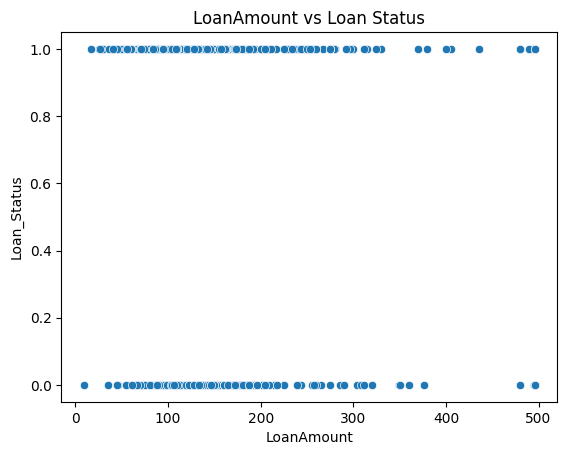

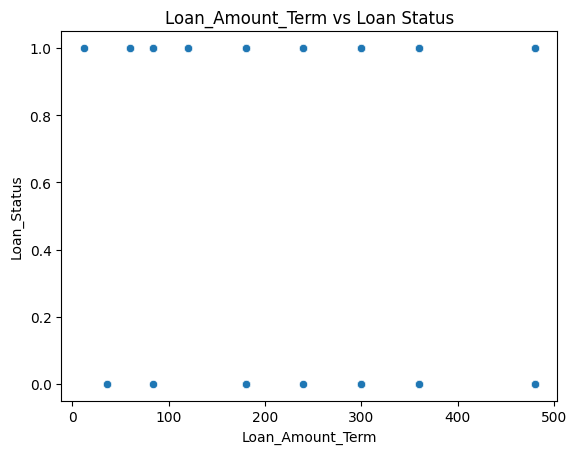

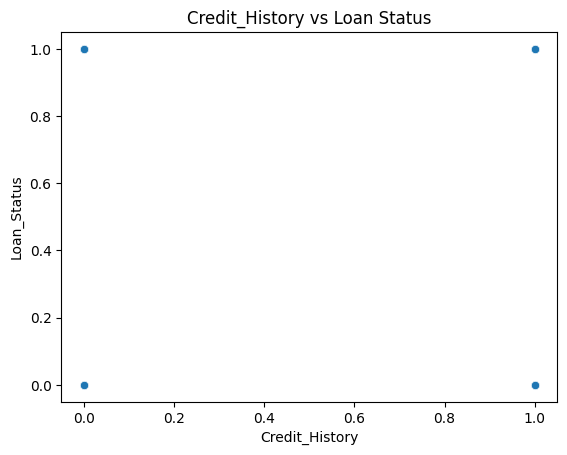

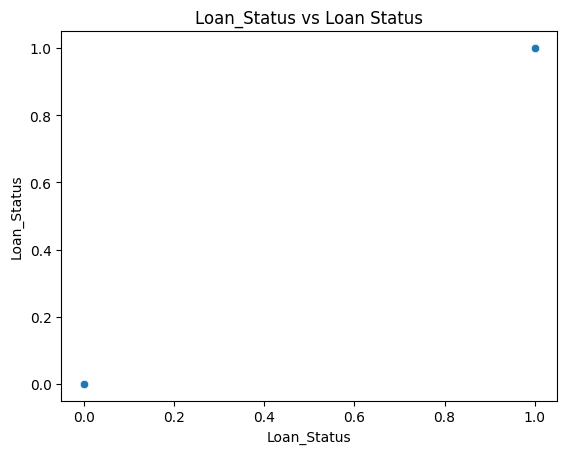

In [102]:

for col in num_features.columns:
    sns.scatterplot(x=df1[col], y=df1['Loan_Status'])
    plt.title(f"{col} vs Loan Status")
    plt.show()


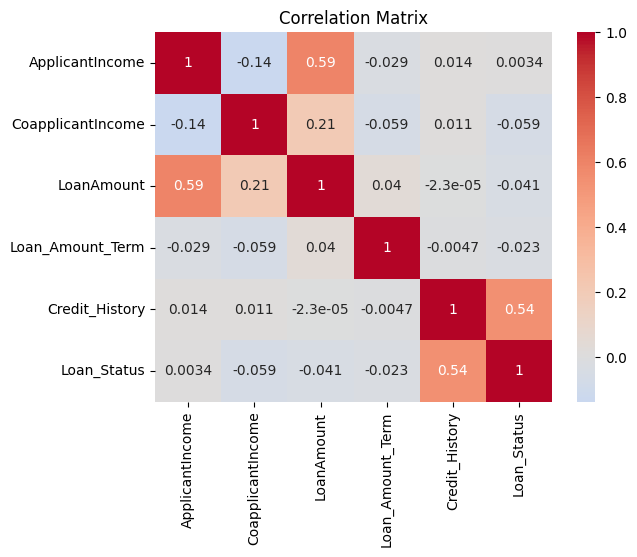

In [103]:
corr = num_features.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()


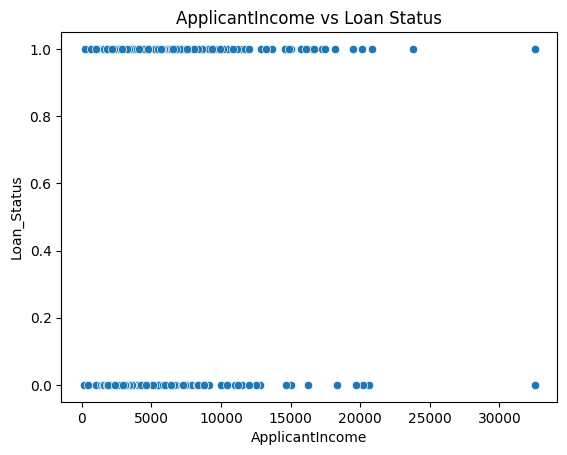

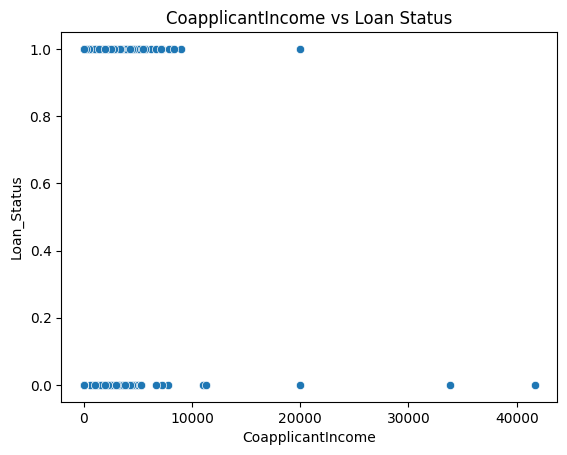

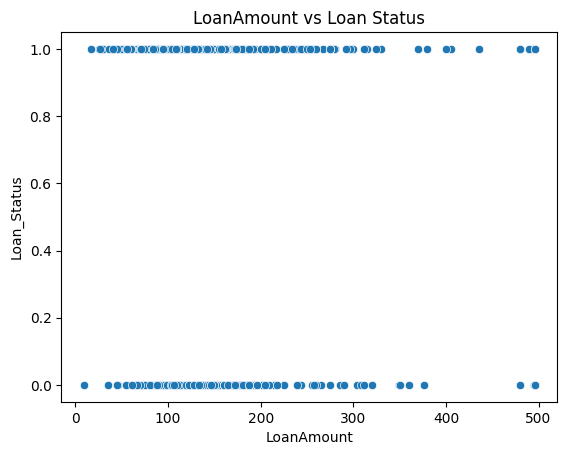

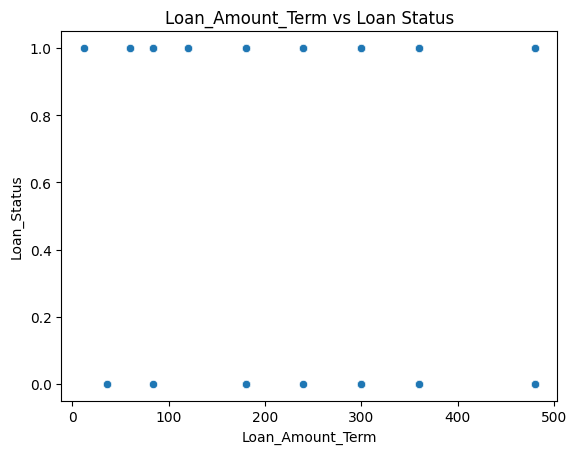

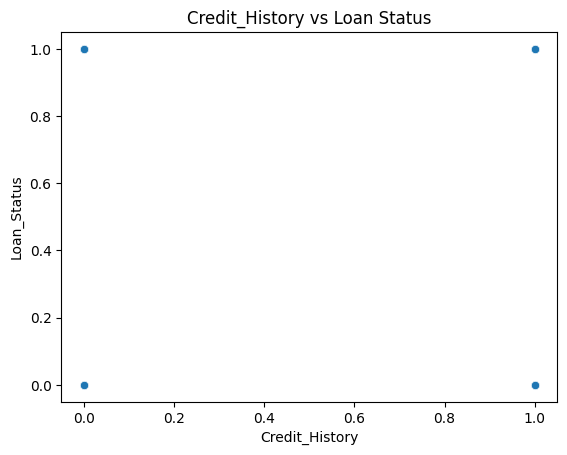

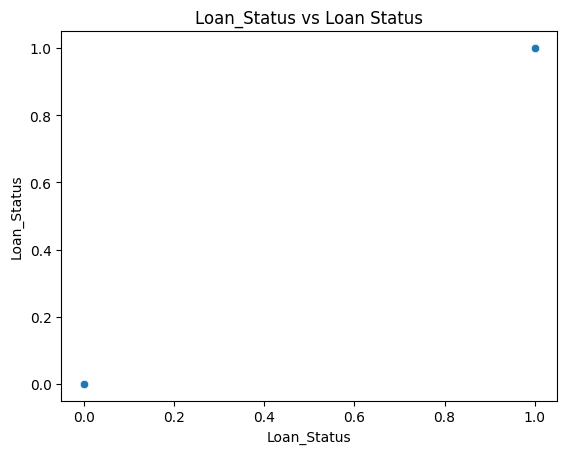


Loan_ID vs Loan Status:
 Loan_Status      0      1
Loan_ID                  
lp001002       0.0  100.0
lp001003     100.0    0.0
lp001005       0.0  100.0
lp001006       0.0  100.0
lp001008       0.0  100.0
...            ...    ...
lp002978       0.0  100.0
lp002979       0.0  100.0
lp002983       0.0  100.0
lp002984       0.0  100.0
lp002990     100.0    0.0

[614 rows x 2 columns]

Gender vs Loan Status:
 Loan_Status     0     1
Gender                 
female       33.0  67.0
male         30.9  69.1

Married vs Loan Status:
 Loan_Status     0     1
Married                
no           37.1  62.9
yes          28.2  71.8

Dependents vs Loan Status:
 Loan_Status     0     1
Dependents             
0            31.4  68.6
1            35.3  64.7
2            24.8  75.2
3+           35.3  64.7

Education vs Loan Status:
 Loan_Status      0     1
Education               
graduate      29.2  70.8
not graduate  38.8  61.2

Self_Employed vs Loan Status:
 Loan_Status       0     1
Self_Emplo

In [112]:

for col in num_features.columns:
    sns.scatterplot(x=df1[col], y=df1['Loan_Status'])
    plt.title(f"{col} vs Loan Status")
    plt.show()

for col in cat_cols:
    ct = pd.crosstab(df1[col], df1['Loan_Status'], normalize='index') * 100
    print(f"\n{col} vs Loan Status:\n", ct.round(1))


In [115]:

# def plot_loan_status(df, column):
#     """
#     Plots bar and pie charts showing the relationship between a categorical feature
#     and Loan_Status (1 = Approved, 0 = Not Approved).
#     """
#     # Create a crosstab (percentage of approvals per category)
#     ct = pd.crosstab(df[column], df['Loan_Status'], normalize='index') * 100
    
#     # --- Bar Chart ---
#     ct.plot(kind='bar', figsize=(6,4), edgecolor='black')
#     plt.title(f"Loan Status by {column} (%) - Bar Chart")
#     plt.ylabel("Percentage")
#     plt.xlabel(column)
#     plt.legend(title="Loan Status", labels=["Not Approved (0)", "Approved (1)"])
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

#     # --- Pie Chart ---
#     loan_counts = df[column].value_counts()
#     plt.figure(figsize=(5,5))
#     plt.pie(
#         loan_counts,
#         labels=loan_counts.index,
#         autopct='%1.1f%%',
#         startangle=90,
#         wedgeprops={'edgecolor':'black'}
#     )
#     plt.title(f"Distribution of {column} - Pie Chart")
#     plt.tight_layout()
#     plt.show()


In [117]:
# plot_loan_status(df1, 'Education')
# plot_loan_status(df1, 'Gender')
# plot_loan_status(df1, 'Credit_History')


 Feature: ApplicantIncome vs Loan_Status
                    mean          std    min       max
Loan_Status                                           
0            5186.884479  4473.935245  150.0  32540.41
1            5219.938507  4565.936928  210.0  32540.41



C:\Users\USER\AppData\Local\Temp\ipykernel_11280\1015234264.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df1, palette='Set2')


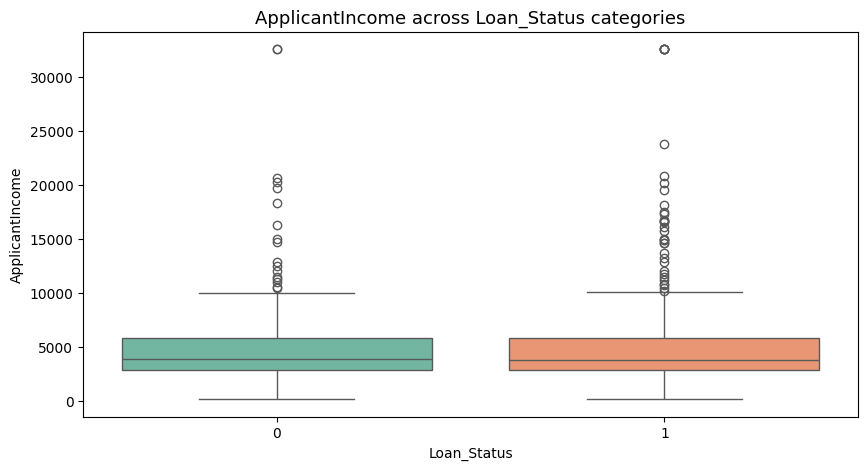

C:\Users\USER\AppData\Local\Temp\ipykernel_11280\1015234264.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=df1, palette='Set3')


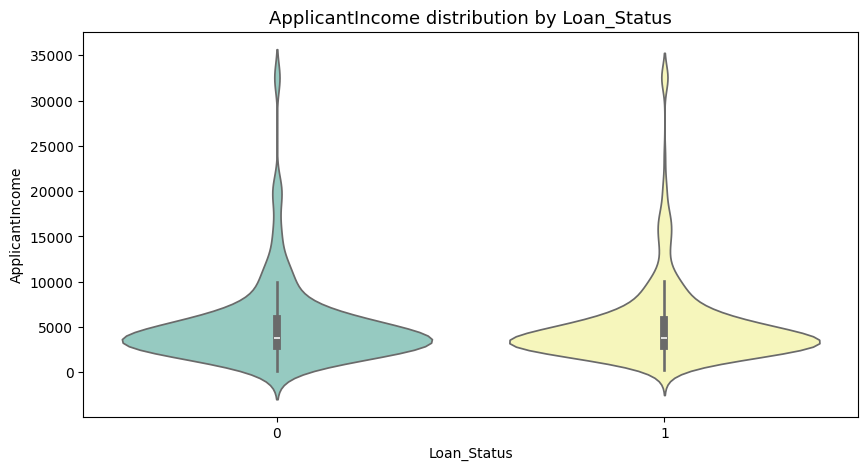

 Feature: CoapplicantIncome vs Loan_Status
                    mean          std  min      max
Loan_Status                                        
0            1877.807292  4384.060103  0.0  41667.0
1            1504.516398  1924.754855  0.0  20000.0



C:\Users\USER\AppData\Local\Temp\ipykernel_11280\1015234264.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df1, palette='Set2')


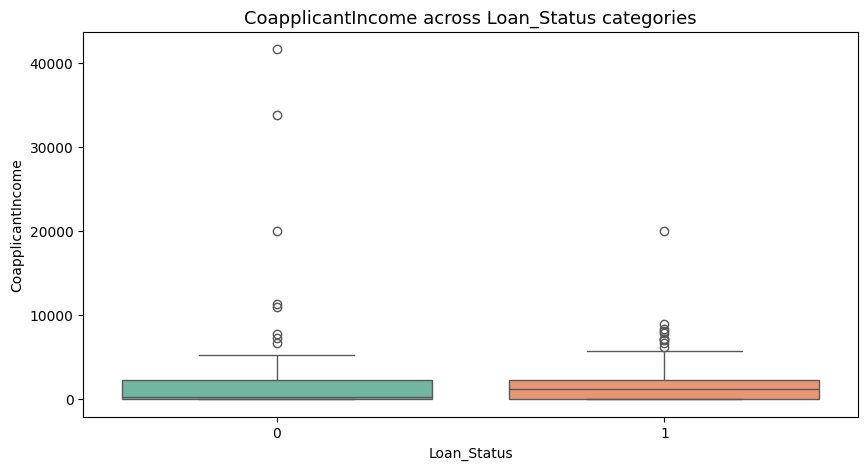

C:\Users\USER\AppData\Local\Temp\ipykernel_11280\1015234264.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=df1, palette='Set3')


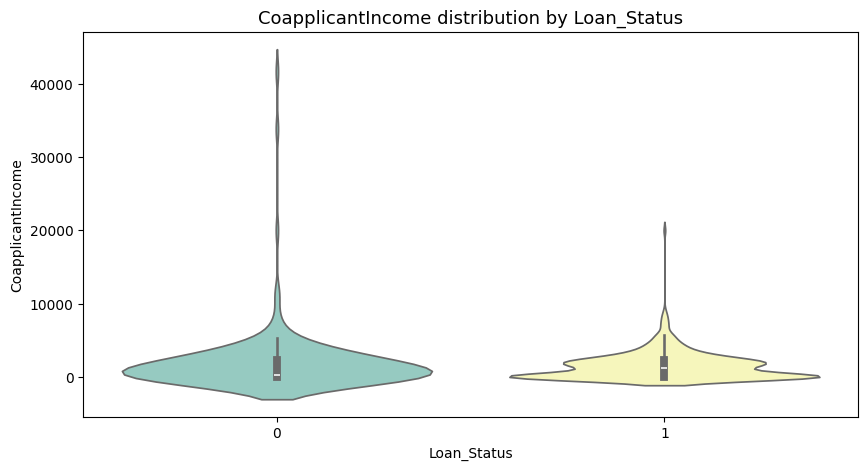

 Feature: LoanAmount vs Loan_Status
                   mean        std   min     max
Loan_Status                                     
0            149.483021  81.636719   9.0  495.87
1            142.526896  77.247385  17.0  495.87



C:\Users\USER\AppData\Local\Temp\ipykernel_11280\1015234264.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df1, palette='Set2')


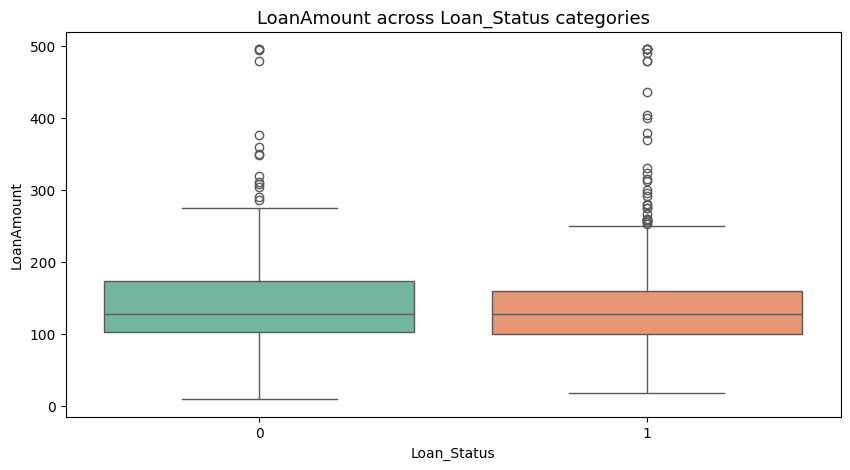

C:\Users\USER\AppData\Local\Temp\ipykernel_11280\1015234264.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=df1, palette='Set3')


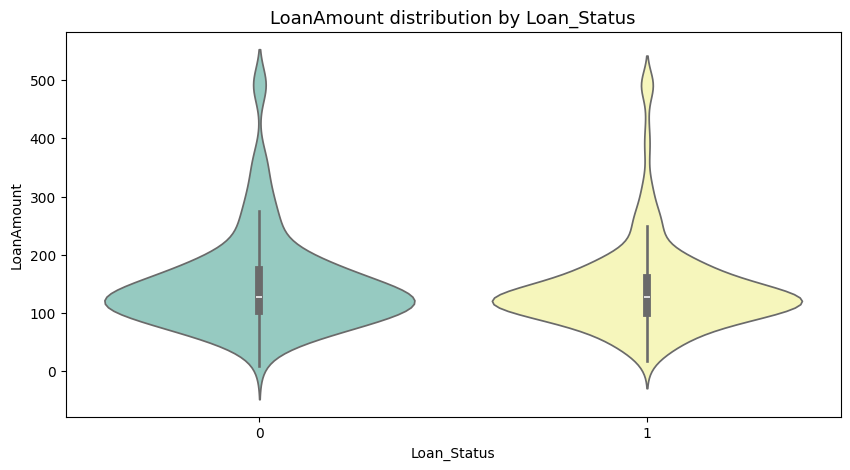

 Feature: Loan_Amount_Term vs Loan_Status
                  mean        std   min    max
Loan_Status                                   
0            344.56250  68.199402  36.0  480.0
1            341.43128  62.697242  12.0  480.0



C:\Users\USER\AppData\Local\Temp\ipykernel_11280\1015234264.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df1, palette='Set2')


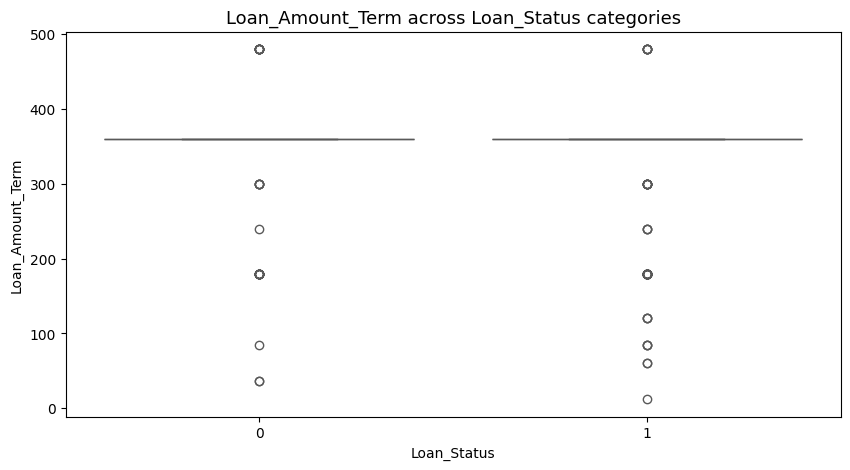

C:\Users\USER\AppData\Local\Temp\ipykernel_11280\1015234264.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=df1, palette='Set3')


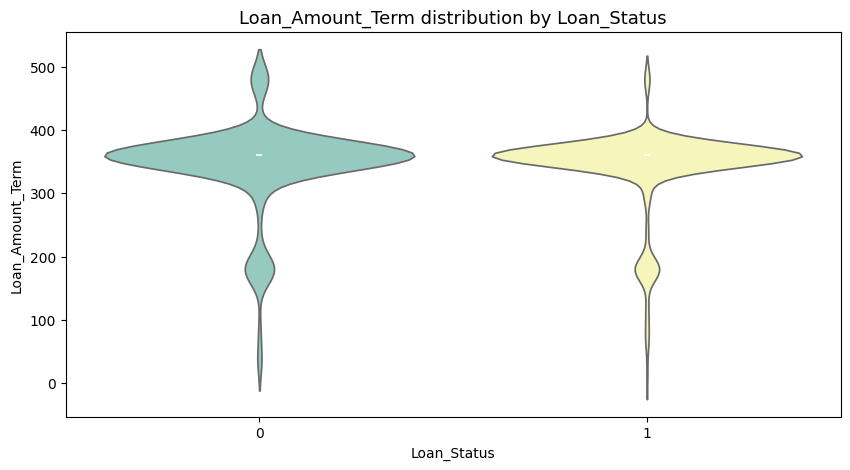

 Feature: Credit_History vs Loan_Status
                 mean       std  min  max
Loan_Status                              
0            0.572917  0.495948  0.0  1.0
1            0.983412  0.127872  0.0  1.0



C:\Users\USER\AppData\Local\Temp\ipykernel_11280\1015234264.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df1, palette='Set2')


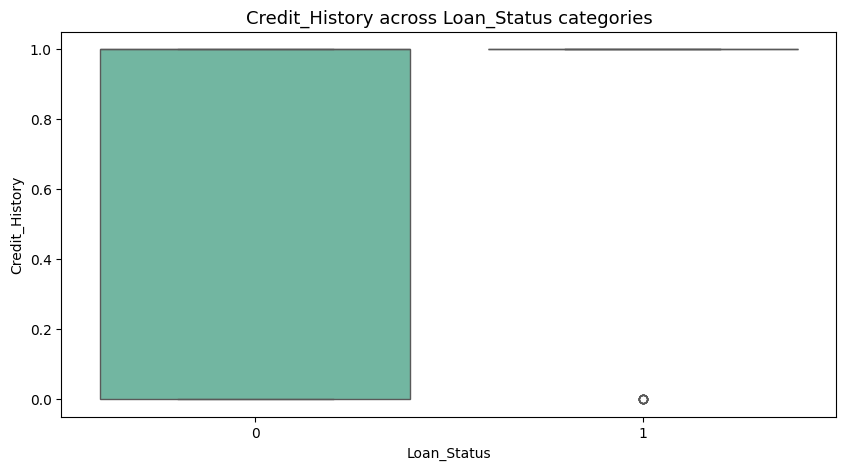

C:\Users\USER\AppData\Local\Temp\ipykernel_11280\1015234264.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=df1, palette='Set3')


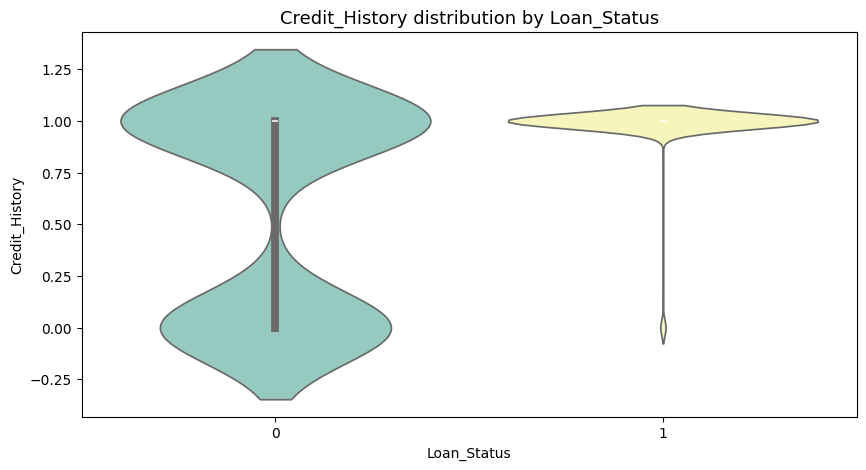

 Feature: Loan_Status vs Loan_Status
             mean  std  min  max
Loan_Status                     
0             0.0  0.0  0.0  0.0
1             1.0  0.0  1.0  1.0



C:\Users\USER\AppData\Local\Temp\ipykernel_11280\1015234264.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df1, palette='Set2')


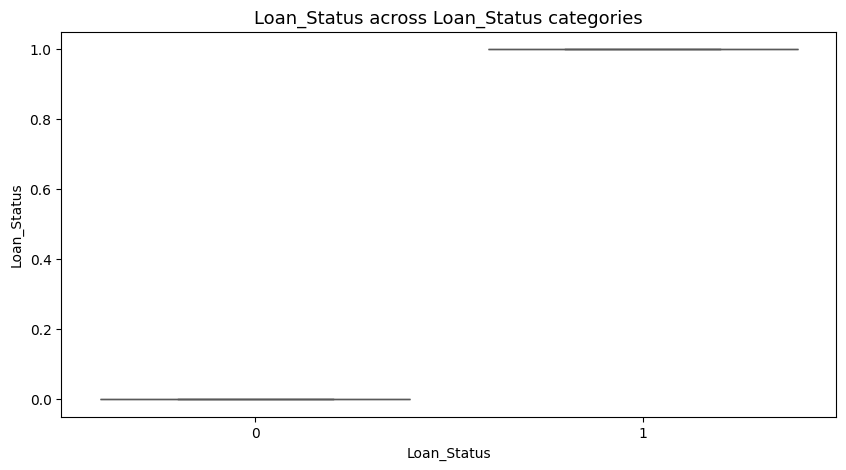

C:\Users\USER\AppData\Local\Temp\ipykernel_11280\1015234264.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=df1, palette='Set3')


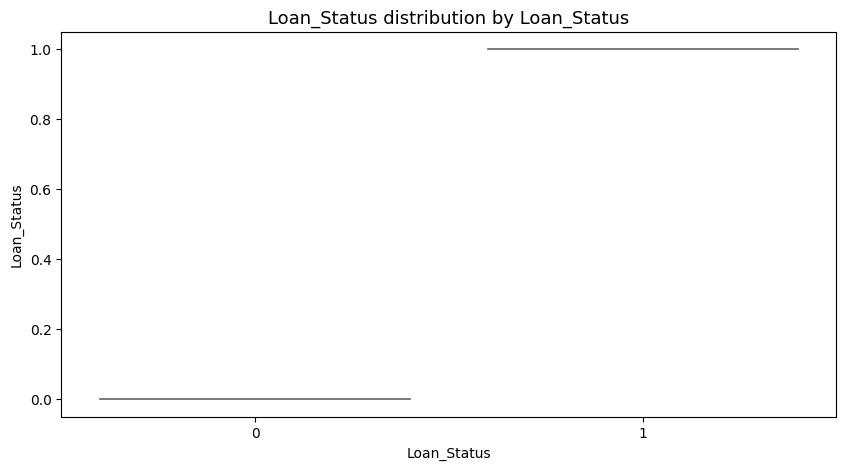

In [100]:
# lets apply our function using loops
for col in num_features:
    bivariate_num_cat(df1, col, target='Loan_Status')

In [ ]:
url = 'https://raw.githubusercontent.com/cheryvmak/Dataset-Repo/refs/heads/main/Data_files/home_loan_test.csv'
test_data = pd.read_csv(url)
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
df2 = test_data.copy()
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
# lets pick out the numerical columns and get the descriptions
num_features = df1.select_dtypes(include=['float64', 'int64']).columns
df1[num_features].describe().T